<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf-intro/2020-01-images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image recognition using CNNs

* https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac
* Extended version containing transfer learning (although not very successful): https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf2/images-intro.ipynb

In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20

figsize_3d = (12, 12)

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [0]:
tf.random.set_seed(42)

In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
# https://github.com/AndreasMadsen/python-lrcurve
!pip install -q lrcurve

In [0]:
from lrcurve import KerasLearningCurve

## Introducing image recognition: MobilNet V2 trained on the ImageNet database

http://image-net.org/

<a href='http://image-net.org/'>
<img src='https://djcordhose.github.io/ml-workshop/img/imagenet.png'>
</a>



In [0]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
mobilnetv2_model = MobileNetV2(weights='imagenet', input_shape=(224, 224, 3))
# mobilnetv2_model.summary()
len(mobilnetv2_model.layers)

157

### Imagenet
* Collection of labelled images from many categories
* http://image-net.org/

http://image-net.org/about-stats

<table class="table-stats" style="width: 500px">
<tbody><tr>
<td width="25%"><b>High level category</b></td>
<td width="20%"><b># synset (subcategories)</b></td>
<td width="30%"><b>Avg # images per synset</b></td>
<td width="25%"><b>Total # images</b></td>
</tr>

<tr><td>amphibian</td><td>94</td><td>591</td><td>56K</td></tr>

<tr><td>animal</td><td>3822</td><td>732</td><td>2799K</td></tr>

<tr><td>appliance</td><td>51</td><td>1164</td><td>59K</td></tr>

<tr><td>bird</td><td>856</td><td>949</td><td>812K</td></tr>

<tr><td>covering</td><td>946</td><td>819</td><td>774K</td></tr>

<tr><td>device</td><td>2385</td><td>675</td><td>1610K</td></tr>

<tr><td>fabric</td><td>262</td><td>690</td><td>181K</td></tr>

<tr><td>fish</td><td>566</td><td>494</td><td>280K</td></tr>

<tr><td>flower</td><td>462</td><td>735</td><td>339K</td></tr>

<tr><td>food</td><td>1495</td><td>670</td><td>1001K</td></tr>

<tr><td>fruit</td><td>309</td><td>607</td><td>188K</td></tr>

<tr><td>fungus</td><td>303</td><td>453</td><td>137K</td></tr>

<tr><td>furniture</td><td>187</td><td>1043</td><td>195K</td></tr>

<tr><td>geological formation</td><td>151</td><td>838</td><td>127K</td></tr>

<tr><td>invertebrate</td><td>728</td><td>573</td><td>417K</td></tr>

<tr><td>mammal</td><td>1138</td><td>821</td><td>934K</td></tr>

<tr><td>musical instrument</td><td>157</td><td>891</td><td>140K</td></tr>


<tr><td>plant</td><td>1666</td><td>600</td><td>999K</td></tr>

<tr><td>reptile</td><td>268</td><td>707</td><td>190K</td></tr>

<tr><td>sport</td><td>166</td><td>1207</td><td>200K</td></tr>

<tr><td>structure</td><td>1239</td><td>763</td><td>946K</td></tr>

<tr><td>tool</td><td>316</td><td>551</td><td>174K</td></tr>

<tr><td>tree</td><td>993</td><td>568</td><td>564K</td></tr>

<tr><td>utensil</td><td>86</td><td>912</td><td>78K</td></tr>

<tr><td>vegetable</td><td>176</td><td>764</td><td>135K</td></tr>

<tr><td>vehicle</td><td>481</td><td>778</td><td>374K</td></tr>

<tr><td>person</td><td>2035</td><td>468</td><td>952K</td></tr>

</tbody></table>

In [0]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

import numpy as np

def predict(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    print('Predicted:', decode_predictions(preds, top=3)[0])

### Let's try it out on a few images

In [0]:
!curl -O https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Beagle_Upsy.jpg/440px-Beagle_Upsy.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44891  100 44891    0     0   974k      0 --:--:-- --:--:-- --:--:--  974k


<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Beagle_Upsy.jpg/440px-Beagle_Upsy.jpg'>

In [0]:
predict(model = mobilnetv2_model, img_path = '440px-Beagle_Upsy.jpg')

Predicted: [('n02088364', 'beagle', 0.40957186), ('n02101388', 'Brittany_spaniel', 0.14605412), ('n02089867', 'Walker_hound', 0.12106487)]


In [0]:
!curl -O https://djcordhose.github.io/ml-workshop/img/cat-bonkers.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  843k  100  843k    0     0  2928k      0 --:--:-- --:--:-- --:--:-- 2928k


<img src='https://djcordhose.github.io/ml-workshop/img/cat-bonkers.png'>

In [0]:
predict(model = mobilnetv2_model, img_path = 'cat-bonkers.png')

Predicted: [('n02124075', 'Egyptian_cat', 0.43944395), ('n02123045', 'tabby', 0.40163487), ('n02123159', 'tiger_cat', 0.03556939)]


# Exercise: Try this out on two of your images

* If they are available on the internet, download them using CURL like the others
* If they are local, upload them using the files dialog on the left sidebar

How good are the results?
* How sure is the network about its prediction?
* Is it working well?
* Why do you think it is working well or not so well?
* How does this related to the imagenet database?


## Our example: Recognizing Speed Limit Signs

<img src='https://github.com/DJCordhose/ml-workshop/blob/master/img/speed-limit-signs.png?raw=1'>

## Getting the data

In [0]:
!curl -O https://raw.githubusercontent.com/DJCordhose/ml-workshop/master/data/speed-limit-signs.zip
!unzip -qo speed-limit-signs.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1795k  100 1795k    0     0  4234k      0 --:--:-- --:--:-- --:--:-- 4225k


In [0]:
# !ls -lR speed-limit-signs
!ls -l speed-limit-signs

total 28
drwxr-xr-x 2 root root 4096 May  3 13:46 0
drwxr-xr-x 2 root root 4096 May  3 13:46 1
drwxr-xr-x 2 root root 4096 May  3 13:46 2
drwxr-xr-x 2 root root 4096 May  3 13:46 3
drwxr-xr-x 2 root root 4096 May  3 13:46 4
drwxr-xr-x 2 root root 4096 May  3 13:46 5
-rw-r--r-- 1 root root  407 Aug 28  2019 README.md


In [0]:
!cat speed-limit-signs/README.md

Data extracted from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

From https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip just the samples for the speed limit signs 

## Format

https://en.wikipedia.org/wiki/Netpbm_format

Can be previewed on a Mac and be processed by http://scikit-image.org/

## Labels
- 0: 30
- 1: 50
- 2: 70
- 3: 80
- 4: 100
- 5: 120

## Loading and pre-processing

In [0]:
import os
from skimage import data, io, filters

ROOT_PATH = "./"
data_dir = os.path.join(ROOT_PATH, "speed-limit-signs")
type = ".ppm"

# Get all subdirectories of data_dir. Each represents a label.
directories = [d for d in os.listdir(data_dir) 
                if os.path.isdir(os.path.join(data_dir, d))]
# Loop through the label directories and collect the data in
# two lists, labels and images.
labels = []
images = []
for d in directories:
    label_dir = os.path.join(data_dir, d)
    file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(type)]
    # For each label, load it's images and add them to the images list.
    # And add the label number (i.e. directory name) to the labels list.
    for f in file_names:
        images.append(io.imread(f))
        labels.append(int(d))

images, labels = np.array(images), np.array(labels)

In [0]:
images.shape

(379,)

In [0]:
labels.shape

(379,)

In [0]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([79, 81, 68, 53, 41, 57]))

In [0]:
label_names = ['30', '50', '70', '80', '100', '120']

### First image for each Label

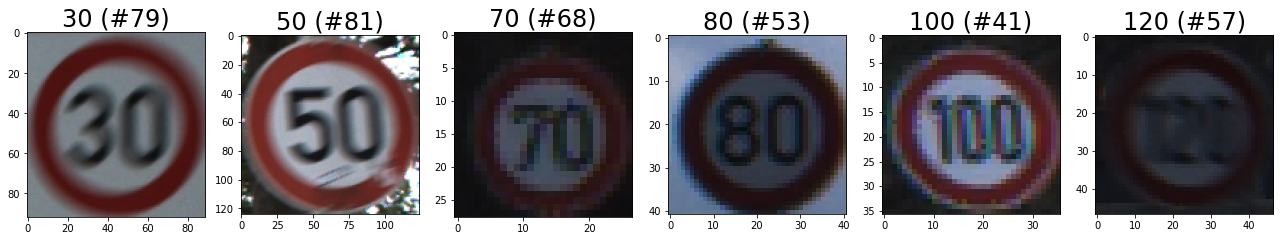

In [0]:
plt.figure(figsize=(30, 15))

unique_values, counts = np.unique(labels, return_counts=True)
classes = len(unique_values)

i = 1
for label in unique_values:
    # Pick the first image for each label.
    image = images[np.where(labels == label)[0][0]]
    plt.subplot(1, 8, i)
    plt.title("{0} (#{1})".format(label_names[label], counts[label]))
    i += 1
    plt.imshow(image)

### Ooops, different resolutions (as you can see from the axes)

We need to have all of them with the same resolution

In [0]:
import skimage.transform

images_32 = np.array([skimage.transform.resize(image, (32, 32)) for image in images])

In [0]:
# 379 samples, 32x32 resoltion, 3 color channels
images_32.shape

(379, 32, 32, 3)

## How to tackle this using neural networks?

In [0]:
X = images_32
y = labels

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((303, 32, 32, 3), (76, 32, 32, 3), (303,), (76,))

### Challenges for Images Recognition

1. Feeding all pixels into Dense Layers will work, but slow and many parameters 
1. Manual Feature extraction from images might work, but
   * is tedious and error prone
   * requires domain knowledge
   * needs frequent manual updates

### Convolutional networks will learn feature extraction before passing few features to Dense Layer Classifiers

https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac

### VGG: a basic network architecture

<img src="https://djcordhose.github.io/ml-workshop/img/vgg.png">

_VGG starts with a number of convolutional blocks for feature extraction and ends with a fully connected classifier_

## VGG contains a number of specialized neural network layers

### Most important: Convolutional Layers - filtering for features

* applying a number of filter kernels
* result of a filter kernel is like a manual feature extraction
* by stacking filter operations we hope to extract meaningful features  
* parameters of the kernerls are initialized randomly
* parameters are learned during training

### Keras Implementation

```model.add(Conv2D(filters=32, activation='relu'))```

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

### How do they work?

<img src='https://djcordhose.github.io/ml-workshop/img/cnn-kernels.gif'>

https://sigmoidprime.com/post/the-inner-workings-of-convolutional-nets/
<br>
https://twitter.com/wster/status/1079741301418049537

### Pooling - reducing size

* reduces computational load
* prevents overfitting by removing details

<img src='http://cs231n.github.io/assets/cnn/pool.jpeg'>

<img src='http://cs231n.github.io/assets/cnn/maxpool.jpeg'>

### Keras Implementation

#### Pooling
```model.add(MaxPooling2D())```

#### Flatten 2d to make it accessible to Dense layers
```model.add(Flatten())```

https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D

### Interactive exploration

* https://github.com/okdalto/VisualizeMNIST
* https://transcranial.github.io/keras-js/#/mnist-cnn
* https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html
* http://setosa.io/ev/image-kernels/

### Regularization

* Dropout: sort of ensemble learning - only use a certain amount of all neurons for each batch
* BatchNormalization: normalize each batch to make it easier to digest for next layer

In [0]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten

model = tf.keras.Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3))) 
# model.add(BatchNormalization())
model.add(MaxPooling2D())
# model.add(Dropout(rate=0.5))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D())
# model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(rate=0.5))
model.add(Dense(classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

## CNNs typically train for a long time: Tensor Board allows us to track progress interactively

In [0]:
# https://www.tensorflow.org/tensorboard/r2/tensorboard_in_notebooks

import datetime, os

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [0]:
# you might have to expand/collapse side bar to see something here
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 466), started 1:00:37 ago. (Use '!kill 466' to kill it.)

<IPython.core.display.Javascript object>

In [0]:
# clean slate
!rm -r logs

In [0]:
!nvidia-smi

Sun May  3 13:46:53 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    43W / 250W |   4679MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
# this is no fun on CPU, on a weak i5 this takes 10 minutes, on decent gpu just one minute
%%time

BATCH_SIZE=50
EPOCHS = 500

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=0, callbacks=[tensorboard_callback])

CPU times: user 1min 2s, sys: 2.82 s, total: 1min 5s
Wall time: 1min


## Evaluation

In [0]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
train_loss, train_accuracy

(0.1576436460018158, 0.9570956826210022)

In [0]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)
test_loss, test_accuracy

(1.2064642906188965, 0.8815789222717285)

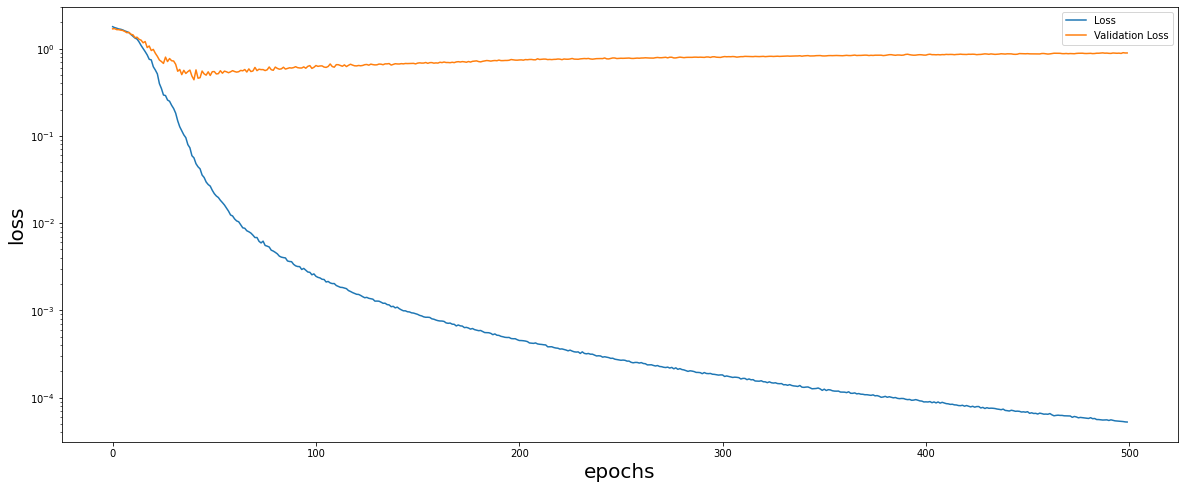

In [0]:
plt.xlabel('epochs')
plt.ylabel('loss')

plt.yscale('log')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss']);

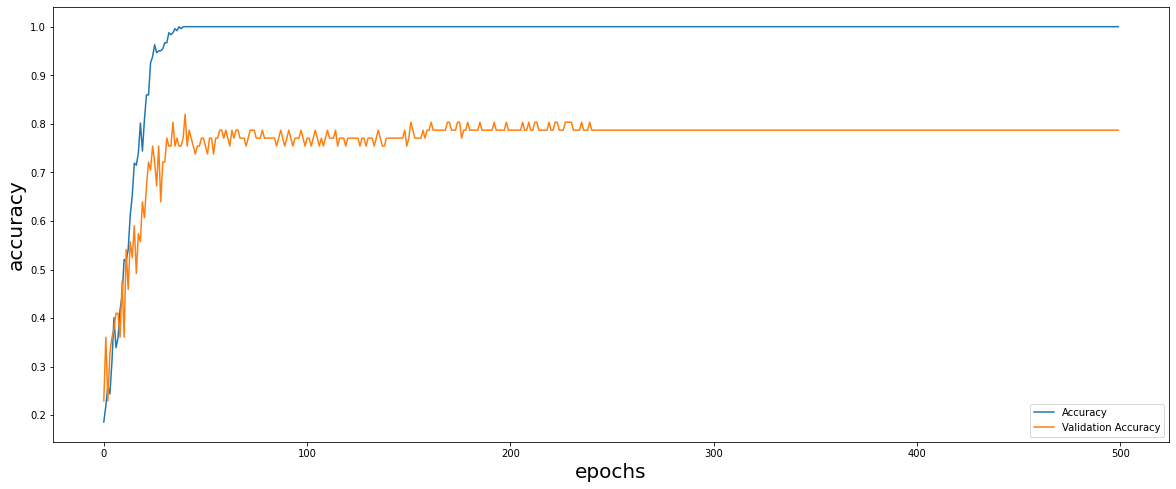

In [0]:
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy']);

In [0]:
y_pred = model.predict(X).argmax(axis=1)
y_pred

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 3, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1,

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
cm

array([[72,  1,  5,  1,  0,  0],
       [ 4, 76,  1,  0,  0,  0],
       [ 1,  0, 67,  0,  0,  0],
       [ 1,  0,  1, 49,  0,  2],
       [ 1,  0,  1,  0, 39,  0],
       [ 0,  0,  1,  2,  0, 54]])

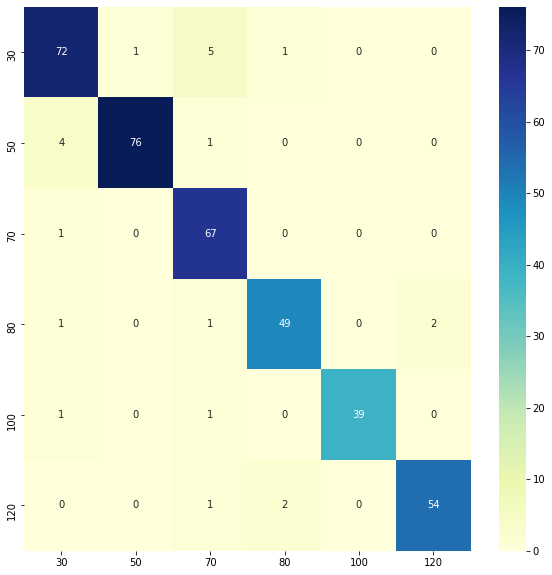

In [0]:
import seaborn as sns

figure = plt.figure(figsize=(10, 10))

sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=label_names, yticklabels=label_names);

### Trying samples exclusively from the test set

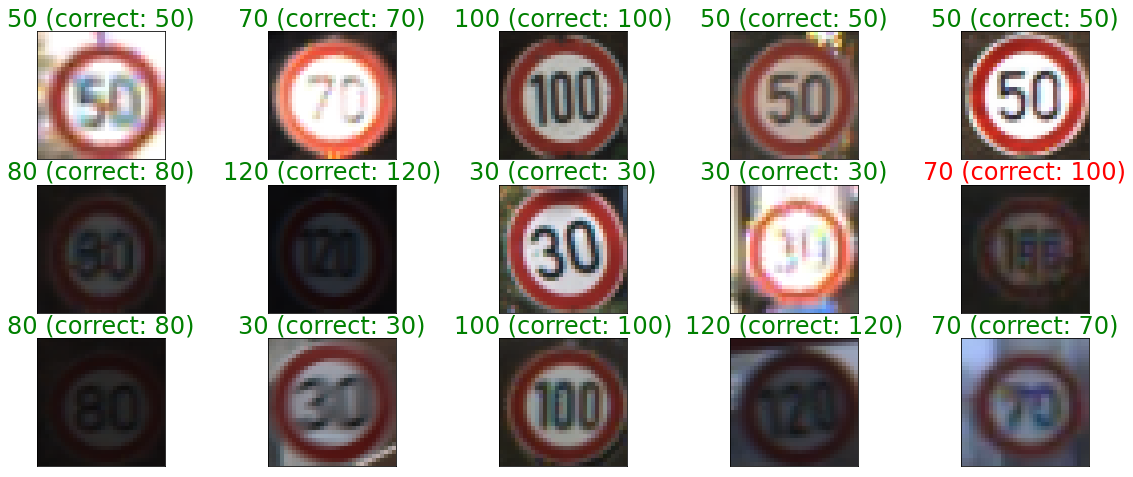

In [0]:
y_pred_test = model.predict(X_test).argmax(axis=1)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = y_pred_test[index]
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} (correct: {})".format(label_names[predict_index], 
                                  label_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [0]:
model.save('speed-signs-simple.h5')

# Exercise: Prevent Overfitting on our VGG model

_For CNN you use the same means of regularization as for other NNs_

Things you can try
* add Dropout (commented out so far)
* add BatchNormalization (commented out so far)
* train for more/less epochs
* other/more/less layers
* less/more nodes per layer
* different sequence, less/more filters

## Alternative: Standard CNN Architectures

<img src='https://miro.medium.com/max/1400/1*n16lj3lSkz2miMc_5cvkrA.jpeg'>

https://towardsdatascience.com/neural-network-architectures-156e5bad51ba

### ResNet
* basic ideas
  * depth does matter
  * 8x deeper than VGG
  * possible by using shortcuts and skipping final fc layer
  * prevents vanishing gradient problem
* https://keras.io/applications/#resnet50
* https://medium.com/towards-data-science/neural-network-architectures-156e5bad51ba

http://arxiv.org/abs/1512.03385
![Deep Learning](https://raw.githubusercontent.com/DJCordhose/ai/master/docs/img/residual.png)

### Mobilenet

_MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications https://arxiv.org/abs/1704.04861_

_MobileNetV2: Inverted Residuals and Linear Bottlenecks https://arxiv.org/abs/1801.04381_

* reduces computational load from ResNet
* uses Depthwise Separable Convolutions, which is much more efficient, but can not perform as many different filters
* recommended to try first, often simply gets the job done

https://towardsdatascience.com/a-basic-introduction-to-separable-convolutions-b99ec3102728



## Keras Applications

Keras provides us with a lot of pre-defined network architectures for image classification (like ResNet and MobileNet)

https://keras.io/applications/

In [0]:
# from tensorflow.keras.applications.resnet50 import ResNet50

# https://keras.io/applications/#mobilenet
# https://arxiv.org/pdf/1704.04861.pdf
from tensorflow.keras.applications.mobilenet import MobileNet
# from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# might take forever to train, so we might prefer mobile net
# model = ResNet50(classes=classes, weights=None, input_shape=(32, 32, 3))

model = MobileNet(classes=classes, weights=None, input_shape=(32, 32, 3))
# MobileNetV2: Inverted Residuals and Linear Bottlenecks: https://arxiv.org/abs/1801.04381
# model = MobileNetV2(classes=classes, weights=None, input_shape=(32, 32, 3))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])

# Spares Dense Layers at the end, thus vastly reducing parameters
# If you wonder, final Logits layer has softmax activation: https://github.com/keras-team/keras-applications/blob/master/keras_applications/mobilenet_v2.py
model.summary()

Model: "mobilenet_1.00_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)  

In [0]:
# clean slate
!rm -r logs

In [0]:
# you might have to expand/collapse side bar to see something here
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 466), started 1:01:49 ago. (Use '!kill 466' to kill it.)

<IPython.core.display.Javascript object>

In [0]:
%%time

BATCH_SIZE=50
EPOCHS = 500

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=0.2, 
                    verbose=0, 
                    callbacks=[tensorboard_callback])

CPU times: user 4min 10s, sys: 9.03 s, total: 4min 19s
Wall time: 4min 7s


In [0]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
train_loss, train_accuracy

(0.26925578713417053, 0.9438943862915039)

In [0]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)
test_loss, test_accuracy

(0.9037132263183594, 0.8289473652839661)

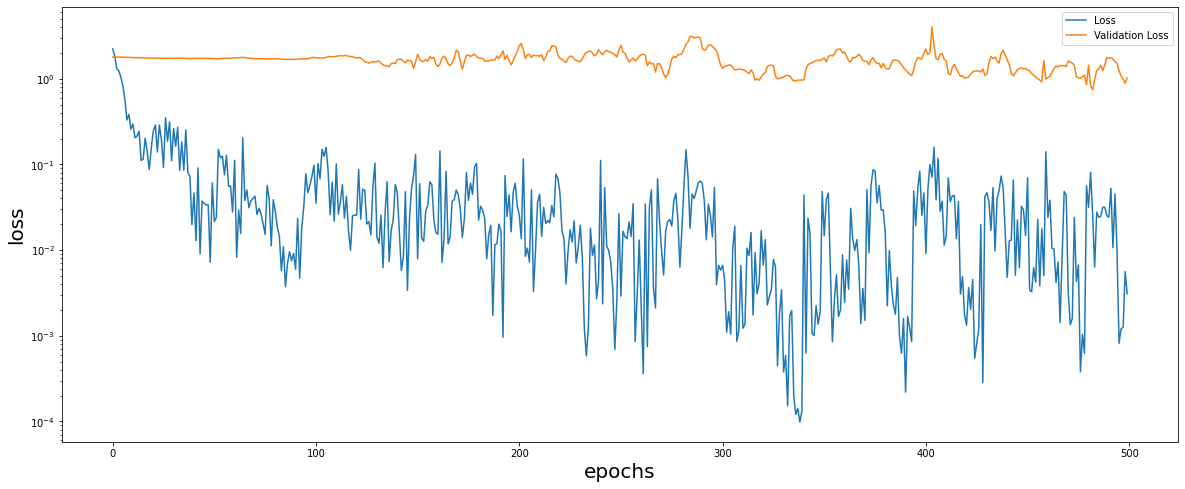

In [0]:
plt.xlabel('epochs')
plt.ylabel('loss')

plt.yscale('log')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])

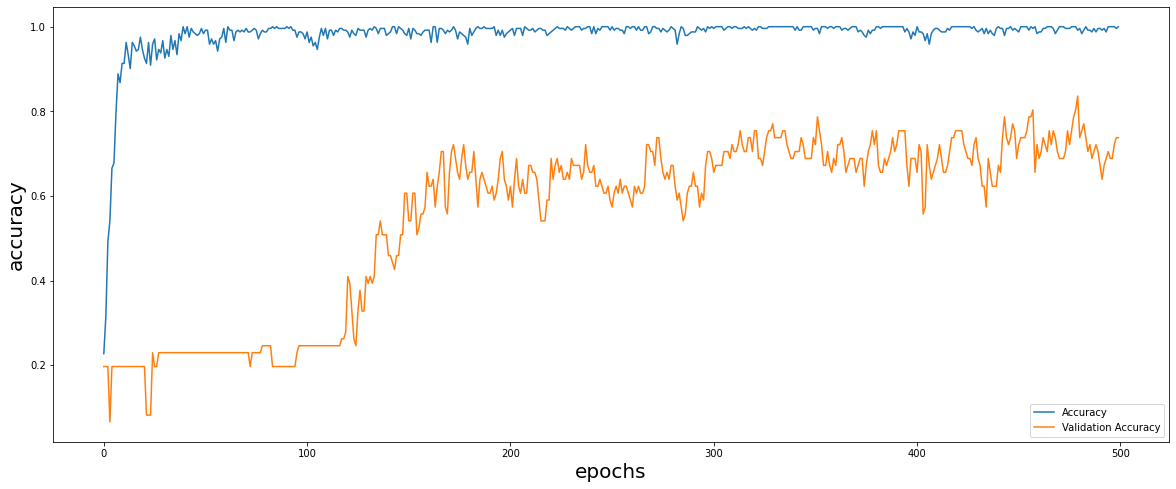

In [0]:
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])

In [0]:
y_pred = model.predict(X).argmax(axis=1)

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
cm

array([[70,  3,  3,  3,  0,  0],
       [ 1, 78,  1,  1,  0,  0],
       [ 1,  4, 61,  0,  1,  1],
       [ 1,  0,  1, 50,  0,  1],
       [ 2,  1,  0,  0, 37,  1],
       [ 2,  0,  2,  0,  0, 53]])

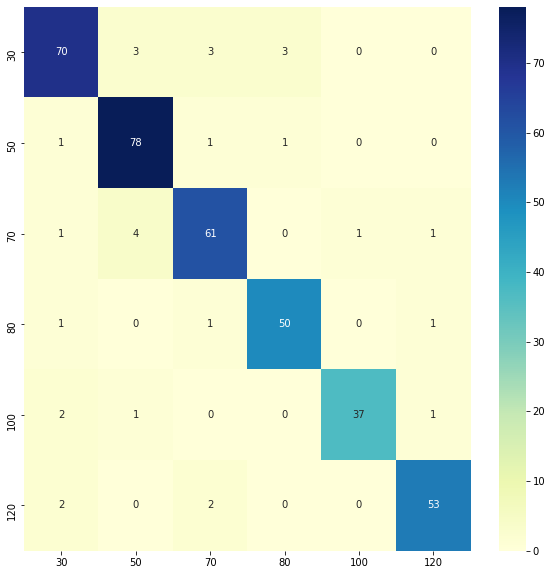

In [0]:
import seaborn as sns

figure = plt.figure(figsize=(10, 10))

sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=label_names, yticklabels=label_names)

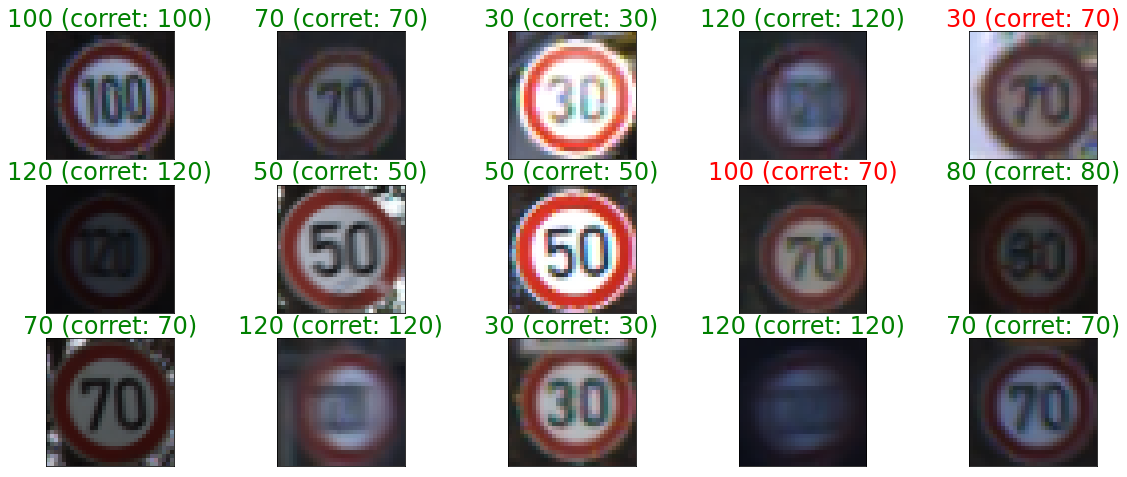

In [0]:
y_pred_test = model.predict(X_test).argmax(axis=1)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = y_pred_test[index]
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} (corret: {})".format(label_names[predict_index], 
                                  label_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [0]:
model.save('speed-signs-mobilenet.h5')